In [1]:
from global_variable import *

In [2]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt
import ast
import numpy as np
import operator
from sklearn.cluster import KMeans
from collections import defaultdict


In [3]:
with open('sensor_for_large_Grid1000_30sensorlistonly.txt', 'r') as f:
    sensor = ast.literal_eval(f.read())

In [4]:
length_of_grid

1000

In [5]:
 sensor=sorted(sensor)

In [6]:
sensor

[(108, 452),
 (130, 409),
 (145, 826),
 (179, 404),
 (199, 230),
 (204, 628),
 (263, 665),
 (323, 319),
 (324, 456),
 (347, 837),
 (367, 899),
 (371, 717),
 (470, 770),
 (492, 310),
 (536, 624),
 (539, 557),
 (578, 311),
 (602, 38),
 (624, 567),
 (642, 530),
 (647, 745),
 (650, 381),
 (667, 360),
 (702, 829),
 (759, 148),
 (845, 401),
 (849, 691),
 (905, 608),
 (958, 562),
 (988, 418)]

In [7]:
s=[list(i) for i in sensor]

In [8]:
X=np.array(s)

## function just to calculate distance between two pdp points

In [9]:
def distance(points,i,j):
    x=points[i][0]-points[j][0]
    y=points[i][1]-points[j][1]
    return math.sqrt(x*x+y*y)

## Function to determine the pdp position in the grid

In [10]:
def calculate_Pdp_positions(length_of_grid,transmission_range):
    pdp_positions={}
    k=0
    for c_1 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
        for c_2 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
            pdp_positions[k]=(c_1*transmission_range*math.sqrt(2),c_2*transmission_range*math.sqrt(2))
            k=k+1
    return pdp_positions

In [11]:
pdp_positions=calculate_Pdp_positions(length_of_grid,transmission_range)

## Function to create the trip graph

In [12]:
def create_trip_graph():
    G=nx.Graph()
    distance_between_pdp={}
    for i in range(len(pdp_positions)):
        G.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(pdp_positions)):
            wt=distance(pdp_positions,u,v)
            G.add_edge('pdp{}'.format(u),'pdp{}'.format(v),weight=wt)
            distance_between_pdp[(u,v)]=wt
    return G,distance_between_pdp

In [13]:
trip_graph,distance_between_pdp=create_trip_graph()

## This function calculates the pdp with the minimum distance betweeen the cluster center

In [14]:
def calculate_min_pdp_distance_with_cluster_center(c_centers,pdp_positions):
    """
    Function to calculate the nearest pdp_position to the cluster center 
    """
    new_dict={}
    for i in c_centers:
        temp={}
        for p,value in pdp_positions.items():
            arr=np.array(value)
            #print(arr)
            dist=np.linalg.norm(i-arr)
            temp[p]=dist
        #print(temp)
        print(min(temp.items(),key=operator.itemgetter(1))[0])
        print(min(temp.items(),key=operator.itemgetter(1))[1])
        print("******")
        new_dict[tuple(i)]=min(temp.items(),key=operator.itemgetter(1))[0]

    return new_dict

In [15]:
K=nx.DiGraph()

In [16]:
for i in range(len(sensor)):
    K.add_node('sensor{}'.format(i),pos=sensor[i])

In [17]:
def calulate_distance_between_each_sensors_and_assign_weight(points,K):
    distance_sensors={}
    M=K
    k=0
    edge_weight=1
    for i in range(len(points)):
        for j in range(len(points)):
            euclidean_distance=distance(points,i,j)
            if i!=j:
                #M.add_edge("sensor{}".format(i),"sensor{}".format(j))

                
                if euclidean_distance<=transmission_range:
                    #if M.has_edge('sensor{}'.format(i),'sensor{}'.format(j))!=True:
                    M.add_edge("sensor{}".format(i),"sensor{}".format(j))

                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=1

                    distance_sensors[i,j]=(euclidean_distance,edge_weight)
#                 else:
#                     M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=100
#                     distance_sensors[i,j]=(euclidean_distance,100)
#             k=k+1
    return distance_sensors,M

In [18]:
euclidean_distance_between_sensor,L=calulate_distance_between_each_sensors_and_assign_weight(sensor,K)

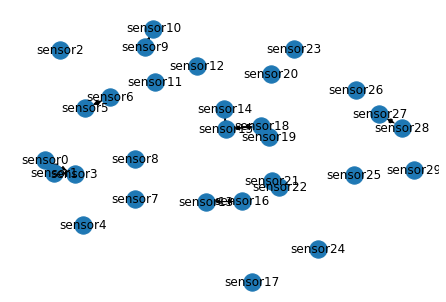

In [19]:
nx.draw(L,nx.get_node_attributes(L,'pos'),with_labels=True)

In [20]:
def distance_pdp_sensors(pdp_positions,sensor,u,v):
    x=pdp_positions[u][0]-sensor[v][0]
    y=pdp_positions[u][1]-sensor[v][1]
    return math.sqrt(x*x+y*y)

## Function that is used for creating the conncectivity graph

In [21]:
def connectivity_graph(pdp_positions,sensor,K):
    J=K
    distance_pdp_each_sensor={}
    k=0
    weight=1
    for i in range(len(pdp_positions)):
        J.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(sensor)):
            euclidean_distance_between_pdp_sensor=distance_pdp_sensors(pdp_positions,sensor,u,v)
            J.add_edge("pdp{}".format(u),"sensor{}".format(v))
            
            if euclidean_distance_between_pdp_sensor<=transmission_range:
                #J.add_edge("pdp{}".format(u),"sensor{}".format(v))
                #if J.has_edge('pdp{}'.format(i),'sensor{}'.format(j))!=True:
                    #J.add_edge("pdp{}".format(u),"sensor{}".format(v))
               
                
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=1
                distance_pdp_each_sensor[u,v]=euclidean_distance_between_pdp_sensor,weight
            else:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=100
                distance_pdp_each_sensor[u,v]=euclidean_distance_between_pdp_sensor,100
#            k=k+1
    return distance_pdp_each_sensor,J

In [22]:
distance_between_pdp_to_each_sensor,N=connectivity_graph(pdp_positions,sensor,L)

# Here it finds the shortest distance between each pdp and 

In [23]:
k=0
arc_length={}
shortest_path={}
for i in range(len(pdp_positions)):
    for j in range(len(sensor)):
        if N.has_edge('pdp{}'.format(i),'sensor{}'.format(j)):
            shortest_path[i,j]=nx.shortest_path(N,source='pdp{}'.format(i),target='sensor{}'.format(j),
                                              weight='weight',method='dijkstra')
            arc_length[i,j]=nx.dijkstra_path_length(N,'pdp{}'.format(i),'sensor{}'.format(j))
            
           
        else:
            shortest_path[i,j]=0

In [24]:
new_zipped=dict(zip(arc_length.items(),shortest_path.values()))

In [25]:
new_zipped

{((0, 0), 100): ['pdp0', 'sensor0'],
 ((0, 1), 100): ['pdp0', 'sensor1'],
 ((0, 2), 100): ['pdp0', 'sensor2'],
 ((0, 3), 100): ['pdp0', 'sensor3'],
 ((0, 4), 100): ['pdp0', 'sensor4'],
 ((0, 5), 100): ['pdp0', 'sensor5'],
 ((0, 6), 100): ['pdp0', 'sensor6'],
 ((0, 7), 100): ['pdp0', 'sensor7'],
 ((0, 8), 100): ['pdp0', 'sensor8'],
 ((0, 9), 100): ['pdp0', 'sensor9'],
 ((0, 10), 100): ['pdp0', 'sensor10'],
 ((0, 11), 100): ['pdp0', 'sensor11'],
 ((0, 12), 100): ['pdp0', 'sensor12'],
 ((0, 13), 100): ['pdp0', 'sensor13'],
 ((0, 14), 100): ['pdp0', 'sensor14'],
 ((0, 15), 100): ['pdp0', 'sensor15'],
 ((0, 16), 100): ['pdp0', 'sensor16'],
 ((0, 17), 100): ['pdp0', 'sensor17'],
 ((0, 18), 100): ['pdp0', 'sensor18'],
 ((0, 19), 100): ['pdp0', 'sensor19'],
 ((0, 20), 100): ['pdp0', 'sensor20'],
 ((0, 21), 100): ['pdp0', 'sensor21'],
 ((0, 22), 100): ['pdp0', 'sensor22'],
 ((0, 23), 100): ['pdp0', 'sensor23'],
 ((0, 24), 100): ['pdp0', 'sensor24'],
 ((0, 25), 100): ['pdp0', 'sensor25'],
 ((0, 

In [26]:
def spanning_tree_collecting_time(pdp):
    """This function defines which sensors are connected with the desired pdp"""
    """
    return list
    """
    sensor_subset=[]
    for key,value in new_zipped.items():
        if key[0][0]==pdp:
            if key[1]!=100:
                #print(i)
                sensor_subset.append(key[0][1])
    return sensor_subset

In [27]:
def to_check_the_minimum_hops_between_the_pdp_and_sensor(spanning_tree):
    """In this function we check which sensor can send data to the pdp with minimum hops
    for example if sensor2 is connected with pdp10 with  hop distance with 2 and same sensor2 is connected with 
    pdp11 with hop distance 4 then we assume that sensor2 will send data to the drone when drone is at pdp10 since 
    it has minimum hop distance"""
    subset2=spanning_tree
    for key,value in subset2.items():
        for key1,value1 in subset2.items():
            if key!=key1:
                for i in value:
                    for j in value1:
                        if i==j:
                            #print(i)
                            #s=get_number(i)
                            if nx.dijkstra_path_length(N,'pdp{}'.format(key),'sensor{}'.format(i))>nx.dijkstra_path_length(N,'pdp{}'.format(key1),'sensor{}'.format(i)):
                                subset2[key].remove(i)
                            else:
                                subset2[key1].remove(j)
    return subset2

In [28]:
def create_spanning_tree_for_tour(tour):
    sensor_subset={}
    for i in tour:
        sensor_subset[i]=spanning_tree_collecting_time(i)
    correct_sensor_subset=to_check_the_minimum_hops_between_the_pdp_and_sensor(sensor_subset)
    return correct_sensor_subset

In [29]:
def check_all_sensor_can_send_data(checked_sensor_arc):
    """The main aim of creating this function was to check whether all the sensors are connected to the pdps in the route
    of drone tour.For example we have pdp10 and pdp7 in our route.ie Route=[10 7].We create spanning tree for the both 
    the pdps and check whether all the sensors are connected or not.If all the sensors are not connected in the combined
    spanning tree calculated with the pdps of the Route"""
    s=[]
    for key,values in checked_sensor_arc.items():
        s=list(set().union(s,values))
    if len(s)==len(sensor): # before there was only s==sensor but it was wrong as s is list and sensor is a list of tuple
        return 1
    else:
        return 0
    

In [30]:
def determine_collecting_time(checked_sensor_arc):
    """After checking whether all the sensor can send data while the drone makes a trip in the way as
    described in the Route.We assign collecting time as infinite or call the collecting time function"""
    value=check_all_sensor_can_send_data(checked_sensor_arc)
    if value==1:
        t_collecting=calculate_collecting_time(checked_sensor_arc)
    if value==0:
        t_collecting=math.inf
    return t_collecting

In [31]:
def check_all_sensor_can_send_data(checked_sensor_arc):
    """The main aim of creating this function was to check whether all the sensors are connected to the pdps in the route
    of drone tour.For example we have pdp10 and pdp7 in our route.ie Route=[10 7].We create spanning tree for the both 
    the pdps and check whether all the sensors are connected or not.If all the sensors are not connected in the combined
    spanning tree calculated with the pdps of the Route"""
    s=[]
    for key,values in checked_sensor_arc.items():
        s=list(set().union(s,values))
    if len(s)==len(sensor): # before there was only s==sensor but it was wrong as s is list and sensor is a list of tuple
        return 1
    else:
        return 0
    

In [32]:
def calculate_collecting_time(checked_sensor_arc):
    
    dict_={}
    for key,values in checked_sensor_arc.items():
        weight=0
        if values!=[]:
            for j in values:
                for key1,values1 in new_zipped.items():
                    if key1[0]==(key,j):
                        #print(key1[1])
                        weight=weight+key1[1]
                        t_collecting=(data_rate/bandwidth)*weight
        dict_[key]=t_collecting
    return dict_
    

In [33]:
def calc_cluster_number(sensor):
    
    for i in range(1,len(sensor)):
        new_dict={}
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(X)
        c_centers=tuple(kmeans.cluster_centers_)
        for j in c_centers:
            temp={}
            for p,value in pdp_positions.items():
                arr=np.array(value)
                dist=np.linalg.norm(j-arr)
                temp[p]=dist
#           print(temp)
            new_dict[tuple(j)]=min(temp.items(),key=operator.itemgetter(1))[0]
        subset={}
        print(new_dict)
        for key,values in new_dict.items():
            subset[values]=spanning_tree_collecting_time(values)
        checked=to_check_the_minimum_hops_between_the_pdp_and_sensor(subset)
        check=check_all_sensor_can_send_data(checked)
        if check==1:
            print("i am here")
            df_=calculate_collecting_time(checked)
            print(df_)
            break
    return i,new_dict,df_
        
        
            

In [34]:
n,m,o=calc_cluster_number(sensor)

C:\Users\dilip\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


{(513.7666666666668, 523.0666666666667): 36}
{(704.8823529411765, 475.29411764705884): 43, (263.8461538461539, 585.5384615384615): 20}
{(209.57142857142856, 414.0): 11, (735.3076923076924, 409.61538461538464): 43, (438.7, 746.9000000000001): 29}
{(711.3333333333333, 634.7777777777778): 44, (210.5, 378.33333333333337): 11, (309.57142857142856, 763.1428571428571): 21, (697.625, 295.87500000000006): 42}
{(909.0, 536.0): 52, (309.57142857142856, 763.1428571428571): 21, (624.6666666666666, 258.00000000000006): 34, (210.5, 378.33333333333337): 11, (615.0, 642.0): 37}
{(210.5, 378.33333333333337): 11, (615.0, 642.0): 37, (596.75, 340.5): 34, (909.0, 536.0): 52, (309.57142857142856, 763.1428571428571): 21, (680.5, 93.0): 41}
{(210.5, 378.33333333333337): 11, (585.25, 569.5): 36, (309.57142857142856, 763.1428571428571): 21, (924.0, 497.25): 60, (596.75, 340.5): 34, (680.5, 93.0): 41, (732.6666666666666, 755.0): 45}
{(210.5, 378.33333333333337): 11, (924.0, 497.25): 60, (732.6666666666666, 755.0

In [35]:
coordinates=[]
for key,values in o.items():
    for k,v in pdp_positions.items():
        if key==k:
            l=list(v)
            coordinates.append(l)
    

In [36]:
coordinates

[[141.4213562373095, 424.26406871192853],
 [565.685424949238, 565.685424949238],
 [424.26406871192853, 848.5281374238571],
 [707.1067811865476, 141.4213562373095],
 [989.9494936611666, 565.685424949238],
 [707.1067811865476, 424.26406871192853],
 [141.4213562373095, 282.842712474619],
 [707.1067811865476, 848.5281374238571],
 [282.842712474619, 707.1067811865476],
 [141.4213562373095, 848.5281374238571],
 [848.5281374238571, 424.26406871192853],
 [282.842712474619, 424.26406871192853],
 [565.685424949238, 282.842712474619],
 [565.685424949238, 0.0],
 [848.5281374238571, 707.1067811865476],
 [424.26406871192853, 707.1067811865476],
 [989.9494936611666, 424.26406871192853],
 [282.842712474619, 282.842712474619],
 [707.1067811865476, 707.1067811865476]]

In [37]:
coordinates=[[0,0]]+coordinates

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from gurobipy import *

In [39]:
no_of_vehicles =9


In [40]:
n = len(coordinates)

In [41]:
x = {};

In [42]:
y = {}

In [43]:
m = Model("MVRP")

Academic license - for non-commercial use only - expires 2022-03-14
Using license file C:\Users\dilip\gurobi.lic


In [44]:
dist_matrix = np.empty([n, n])

In [45]:
for i in range(n):
    for j in range(n):
        x[i, j] = m.addVar(vtype=GRB.BINARY, name="x%d,%d" % (i, j))  # 1(Decision variable, formula 1)
        dist_matrix[i, j] = np.sqrt((coordinates[i][0] - coordinates[j][0]) ** 2 + (coordinates[i][1] - coordinates[j][1]) ** 2)  # (Distance matrix)

In [46]:
x

{(0, 0): <gurobi.Var *Awaiting Model Update*>,
 (0, 1): <gurobi.Var *Awaiting Model Update*>,
 (0, 2): <gurobi.Var *Awaiting Model Update*>,
 (0, 3): <gurobi.Var *Awaiting Model Update*>,
 (0, 4): <gurobi.Var *Awaiting Model Update*>,
 (0, 5): <gurobi.Var *Awaiting Model Update*>,
 (0, 6): <gurobi.Var *Awaiting Model Update*>,
 (0, 7): <gurobi.Var *Awaiting Model Update*>,
 (0, 8): <gurobi.Var *Awaiting Model Update*>,
 (0, 9): <gurobi.Var *Awaiting Model Update*>,
 (0, 10): <gurobi.Var *Awaiting Model Update*>,
 (0, 11): <gurobi.Var *Awaiting Model Update*>,
 (0, 12): <gurobi.Var *Awaiting Model Update*>,
 (0, 13): <gurobi.Var *Awaiting Model Update*>,
 (0, 14): <gurobi.Var *Awaiting Model Update*>,
 (0, 15): <gurobi.Var *Awaiting Model Update*>,
 (0, 16): <gurobi.Var *Awaiting Model Update*>,
 (0, 17): <gurobi.Var *Awaiting Model Update*>,
 (0, 18): <gurobi.Var *Awaiting Model Update*>,
 (0, 19): <gurobi.Var *Awaiting Model Update*>,
 (1, 0): <gurobi.Var *Awaiting Model Update*>,
 (1

In [47]:
m

<gurobi.Model Continuous instance MVRP: 0 constrs, 0 vars, No parameter changes>

In [48]:
m.setObjective(quicksum(quicksum(x[(i, j)] * dist_matrix[(i, j)] for j in range(n)) for i in range(n)),
               GRB.MINIMIZE)  #  (Objective function, formula 2)

In [49]:
# for i in range(n):
#     for j in range(n):
#         m.setObjective(quicksum(x[i,j]*dist_matrix[i,j]))

In [50]:
m

<gurobi.Model Continuous instance MVRP: 0 constrs, 0 vars, No parameter changes>

In [51]:
m.addConstr(quicksum(x[(0, j)] for j in range(n)) == no_of_vehicles)  # ( Constraint 1, formula 3)

<gurobi.Constr *Awaiting Model Update*>

In [52]:
m

<gurobi.Model Continuous instance MVRP: 0 constrs, 0 vars, No parameter changes>

In [53]:
m.addConstr(quicksum(x[(i, 0)] for i in range(n)) == no_of_vehicles)  #Constraint 2, formula 4

<gurobi.Constr *Awaiting Model Update*>

In [54]:
m

<gurobi.Model Continuous instance MVRP: 0 constrs, 0 vars, No parameter changes>

In [55]:
for i in range(n - 1):
    m.addConstr(quicksum(x[(i + 1, j)] for j in range(n)) == 1)  # Constraint 3, formula 5

In [56]:
m

<gurobi.Model Continuous instance MVRP: 0 constrs, 0 vars, No parameter changes>

In [57]:
for j in range(n - 1):
    m.addConstr(quicksum(x[(i, j + 1)] for i in range(n)) == 1)  # Constraint 4, formula 6

In [58]:
m

<gurobi.Model Continuous instance MVRP: 0 constrs, 0 vars, No parameter changes>

In [59]:
for j in range(n):  # Constraint 5, formula 7
    for i in range(n):
        m.addConstr((x[i, j] + x[j, i]) <= 1)

In [60]:
m

<gurobi.Model Continuous instance MVRP: 0 constrs, 0 vars, No parameter changes>

In [61]:
m.update()

In [62]:
m.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 440 rows, 400 columns and 1580 nonzeros
Model fingerprint: 0x8960138d
Variable types: 0 continuous, 400 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+02, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 19205.698039
Presolve removed 210 rows and 20 columns
Presolve time: 0.05s
Presolved: 230 rows, 380 columns, 1140 nonzeros
Variable types: 0 continuous, 380 integer (380 binary)

Root relaxation: objective 1.557849e+04, 80 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    15578.489223 15578.4892  0.00%     -    0s

Explored 0 nodes (80 simplex iterations) in 0.13 s

In [63]:
print('\n minimum distance: %g' % m.objVal)


 minimum distance: 15578.5


In [64]:
m.printAttr('x')


    Variable            x 
-------------------------
        x0,7            1 
        x0,9            1 
       x0,11            1 
       x0,12            1 
       x0,13            1 
       x0,14            1 
       x0,16            1 
       x0,17            1 
       x0,19            1 
        x1,0            1 
        x2,0            1 
        x3,0            1 
        x4,0            1 
       x5,15            1 
        x6,0            1 
        x7,1            1 
        x8,0            1 
       x9,10            1 
       x10,0            1 
       x11,6            1 
      x12,18            1 
       x13,2            1 
       x14,4            1 
       x15,0            1 
       x16,3            1 
       x17,5            1 
       x18,0            1 
       x19,8            1 


In [65]:
from_node = []
to_node = np.empty([n, n])

In [66]:
for v in m.getVars():
    from_node.append(v.x)

In [67]:
for i in range(n):
    for j in range(n):
        to_node[i, j] = from_node[n * i + j]

In [68]:
print('\nDistance Matrix (dij):\n', pd.DataFrame(dist_matrix).astype('int64'))
print('\nDecision (Xij):\n', pd.DataFrame(to_node).astype('int64'))


Distance Matrix (dij):
       0    1    2    3    4     5    6    7     8    9    10   11   12   13  \
0      0  447  800  948  721  1140  824  316  1104  761  860  948  509  632   
1    447    0  447  509  632   860  565  141   707  316  424  707  141  447   
2    800  447    0  316  447   424  200  509   316  316  509  316  316  282   
3    948  509  316    0  761   632  509  632   282  200  282  600  447  583   
4    721  632  447  761    0   509  282  583   707  707  905  316  509  200   
5   1140  860  424  632  509     0  316  894   400  721  894  200  721  509   
6    824  565  200  509  282   316    0  583   424  509  707  141  424  200   
7    316  141  509  632  583   894  583    0   800  447  565  721  200  424   
8   1104  707  316  282  707   400  424  800     0  447  565  447  600  583   
9    761  316  316  200  707   721  509  447   447    0  200  632  282  509   
10   860  424  509  282  905   894  707  565   565  200    0  824  447  707   
11   948  707  316  600  31

In [69]:
# to node:Decision matrix
I = []  #Row of decision matrix
J = []  # 决策矩阵的列
for i in range(n):
    for j in range(n):
        if to_node[i, j] > 0.5:
            I.append(i)
            J.append(j)

In [70]:
print(np.array(I))
print(np.array(J))

[ 0  0  0  0  0  0  0  0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19]
[ 7  9 11 12 13 14 16 17 19  0  0  0  0 15  0  1  0 10  0  6 18  2  4  0
  3  5  0  8]


In [71]:
all_routes = {}
cnt = 0

In [72]:
for i in range(no_of_vehicles):
    end = J[i]  # Take out the J[0] of (0,J[0])
    route = [0, end]  # Initial route=[0,J[0]]
    while end != 0:
        start_index = I.index(end)  # (# Find the index corresponding to J[0] in I[], which is the start_index of the next value)
        end = J[start_index]  # (# Put this index, to J[] to find the corresponding value,)
        route.append(end)  #  (Add the value to the sub-route list route)
    all_routes[str(i)] = route  # (Multiple sub-paths constitute the total path expression)
    # Output all_routes, including each sub-route
print('all sub route trace:')
print(all_routes)

all sub route trace:
{'0': [0, 7, 1, 0], '1': [0, 9, 10, 0], '2': [0, 11, 6, 0], '3': [0, 12, 18, 0], '4': [0, 13, 2, 0], '5': [0, 14, 4, 0], '6': [0, 16, 3, 0], '7': [0, 17, 5, 15, 0], '8': [0, 19, 8, 0]}


In [73]:
sub_route_total_distance = {}

for i in range(no_of_vehicles):
    prev_index = 0
    # print('\n')
    sub_route_total_distance[i] = 0
    for j in range(len(all_routes[str(i)])):
        cur_index = all_routes[str(i)][j]
        # print('dist[%d,%d]=%d' % (prev_index, cur_index, dist_matrix[prev_index][cur_index]))
        sub_route_total_distance[i] += dist_matrix[prev_index][cur_index]
        prev_index = cur_index
print('all sub route total distance sum:')
print(sub_route_total_distance)


all sub route total distance sum:
{0: 904.8627177541055, 1: 1821.8098372906534, 2: 1914.7257794113557, 3: 1051.323307596588, 4: 1715.2982445082948, 5: 1486.7956800420359, 6: 1914.7257794113555, 7: 2522.990419382936, 8: 2245.957457956036}


In [74]:
coordinates

[[0, 0],
 [141.4213562373095, 424.26406871192853],
 [565.685424949238, 565.685424949238],
 [424.26406871192853, 848.5281374238571],
 [707.1067811865476, 141.4213562373095],
 [989.9494936611666, 565.685424949238],
 [707.1067811865476, 424.26406871192853],
 [141.4213562373095, 282.842712474619],
 [707.1067811865476, 848.5281374238571],
 [282.842712474619, 707.1067811865476],
 [141.4213562373095, 848.5281374238571],
 [848.5281374238571, 424.26406871192853],
 [282.842712474619, 424.26406871192853],
 [565.685424949238, 282.842712474619],
 [565.685424949238, 0.0],
 [848.5281374238571, 707.1067811865476],
 [424.26406871192853, 707.1067811865476],
 [989.9494936611666, 424.26406871192853],
 [282.842712474619, 282.842712474619],
 [707.1067811865476, 707.1067811865476]]

In [75]:
X=[]
Y=[]
for i,value in enumerate (coordinates):
    X.append(coordinates[i][0])
    Y.append(coordinates[i][1])
    

Text(0.5, 1.0, 'Original sensors and chargers positions')

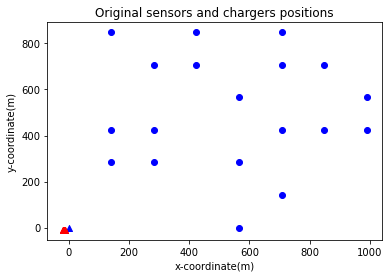

In [76]:
# Figure 1 Original WRSN sensor node and charger Wireless radar sensor network
plt.figure()
plt.scatter(X[1:], Y[1:], marker='o', color='blue')
plt.scatter(X[0], Y[0], marker='^', color='blue')
plt.xlabel('x-coordinate(m)')
plt.ylabel('y-coordinate(m)')
for i in range(no_of_vehicles):
    plt.scatter(X[0] - 20 + i, Y[0] - 10, marker='^', color='red')
plt.title('Original sensors and chargers positions')


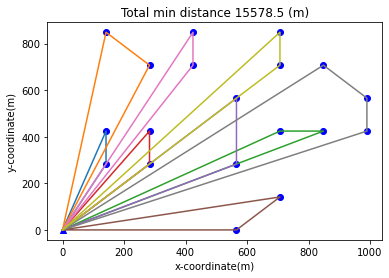

In [77]:
# Figure 2 Trajectory after MTSP solution
plt.figure()
plt.scatter(X[1:], Y[1:], marker='o', color='blue')
plt.scatter(X[0], Y[0], marker='^', color='blue')
plt.xlabel('x-coordinate(m)')
plt.ylabel('y-coordinate(m)')
plt.title('Total min distance %g (m)' % m.objVal)
# plt.plot([XX1, XX2], [YY1, YY2])
for index in all_routes:
    route_list = all_routes[index]
    x = []
    y = []
    for i in route_list:
        x.append(X[i])
        y.append(Y[i])
    plt.plot(x, y)
plt.show()